# Monte Carlo Methode zur Bestimmung von $\pi$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import locale

locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["mathtext.fontset"] = "cm"

## Linearer Kongruenzgenerator

Für die Monte Carlo Simulation werden Zufallszahlen benötigt. Zur Veranschaulichung reicht dabei ein Linearer Kongruenzgenerator mit guten Parametern.

Dieser gibt außerdem Zahlen im Intervall $[0,1)$ aus, welche direkt als Koordinaten verwendet werden können.

In [2]:
class LCG_01:
    def __init__(self, mod: int, a: int, c: int, seed: int):
        self.mod = mod
        self.a = a
        self.c = c
        self.seed = seed

    def __iter__(self):
        return self

    def __next__(self):
        self.seed = (self.a * self.seed + self.c) % self.mod
        return self.seed / self.mod

$\frac{Kreisfläche}{Quadratfläche}=\frac{\frac{1}{4}r^2\pi}{r^2}=\frac{Treffer}{Punkte}$\
$r=1$, da wir nur einen Viertelkreis und somit ein 1x1 Quadrat betrachten

Jeder Wert mit geradem Index wird als X-Koordinate und jeder Wert mit ungeradem Index als dazugehörige Y-Koordinate verwendet.

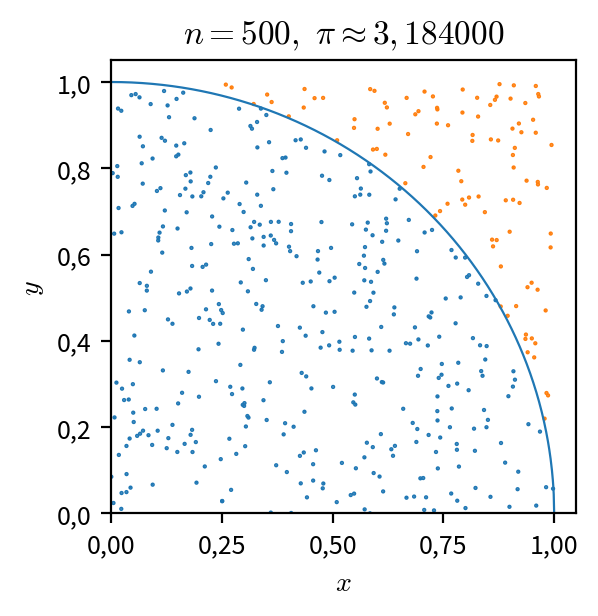

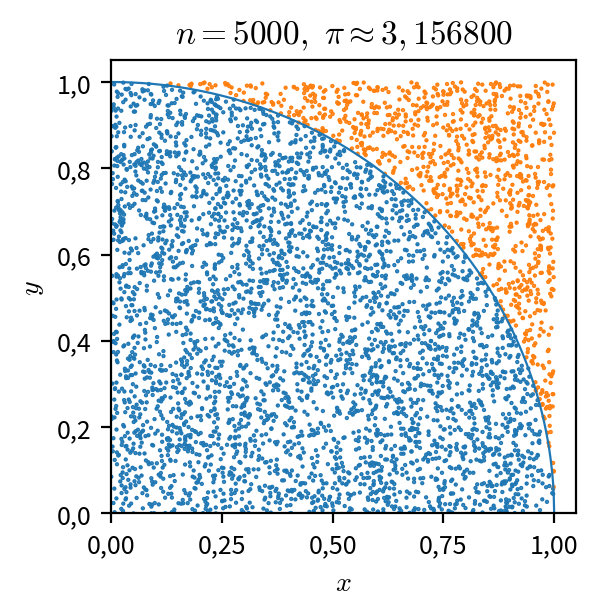

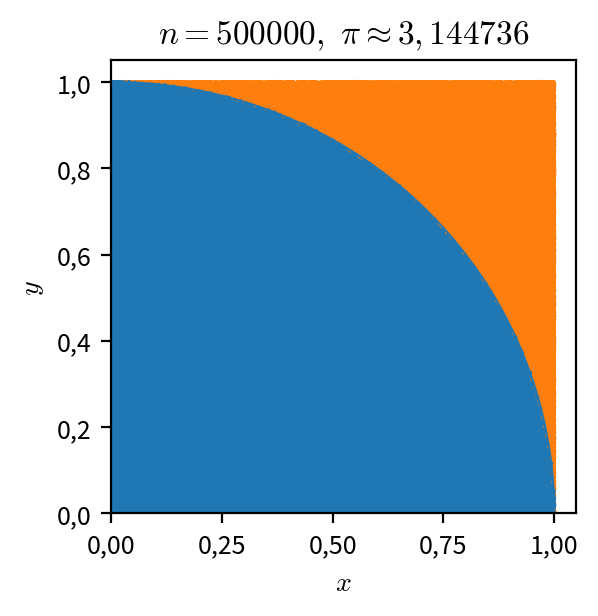

In [3]:
def circle(x: float):
    return np.sqrt(1 - x ** 2)


points = [500, 5000, 500000]

for n_points in points:
    lcg = LCG_01(2 ** 31 - 1, 48271, 0, 1)
    numbers = [next(lcg) for _ in range(2*n_points)]

    x_rnd = np.array(numbers[0::2])
    y_rnd = np.array(numbers[1::2])

    col = np.where(y_rnd <= circle(x_rnd), "C0", "C1")

    # Draw a quarter of a circle
    x = np.linspace(0, 1, 1000)
    y = circle(x)

    hits = np.count_nonzero(col == "C0")
    monte_carlo_pi = (hits * 4) / len(col)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    title = "$n = {},\ \pi \\approx {:.6f}$".format(n_points, monte_carlo_pi).replace(
        ".", ","
    )

    ax.set_title(title)

    # Plot the function
    plt.plot(x, y, "C0", linewidth=0.8)
    plt.scatter(x_rnd, y_rnd, c=col, s=0.3)

    filename = "figures/monte_carlo_pi_n{}.png".format(n_points)
    plt.savefig(filename , dpi=200, bbox_inches='tight', transparent=True)
    plt.show()
